In [5]:
import astropy
import astropy.io.ascii as ascii

In [6]:
data_010=ascii.read('tng_snap91_mstar9.5.txt')  #z=0.10
data_005=ascii.read('tng_snap95_mstar9.5.txt')  #z=0.05
data_000=ascii.read('tng_snap99_mstar9.5.txt')  #z=0.00

In [7]:
data_000

Snap,SubfindID,redshift,Mstar,SFR,IsCentral
int64,int64,float64,float64,float64,int64
99,0,0.0,2418574000000.0,0.1958,1
99,1,0.0,379849600000.0,0.0881,0
99,2,0.0,425932700000.0,5.2942,0
99,3,0.0,120446300000.0,2.1429,0
99,4,0.0,92655380000.0,0.2838,0
99,5,0.0,129470500000.0,0.3852,0
99,6,0.0,215129100000.0,2.1584,0
99,7,0.0,126389900000.0,0.0,0
99,8,0.0,153883000000.0,0.0,0


In [8]:
import matplotlib
import matplotlib.pyplot as pyplot
%matplotlib inline

In [22]:
ssfr=data_000['SFR']/data_000['Mstar']

Text(0, 0.5, 'SFR/Mstar (Specific Star Formation Rate)')

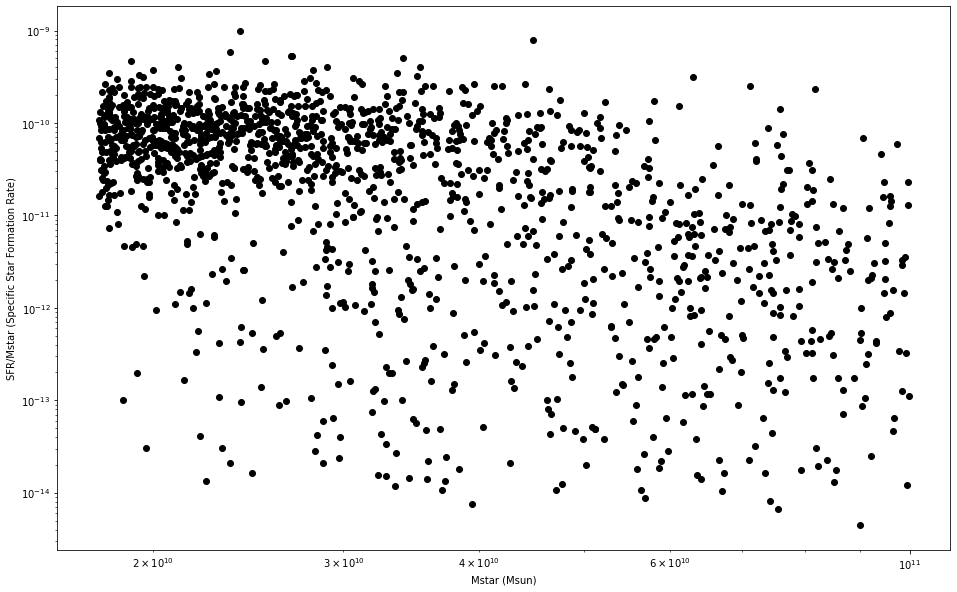

In [37]:
#narrow in on a mass range with morphological diversity

si=np.logical_and(data_000['Mstar'] <= 1.0e11,data_000['Mstar']>=10.0**(10.25))

f=pyplot.figure(figsize=(16,10))
ax=f.add_subplot(111)
ax.loglog(data_000['Mstar'][si],ssfr[si],'ok')
ax.set_xlabel('Mstar (Msun)')
ax.set_ylabel('SFR/Mstar (Specific Star Formation Rate)')

/Users/gsnyder/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/gsnyder/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


Text(0, 0.5, 'SFR/Mstar (Specific Star Formation Rate)')

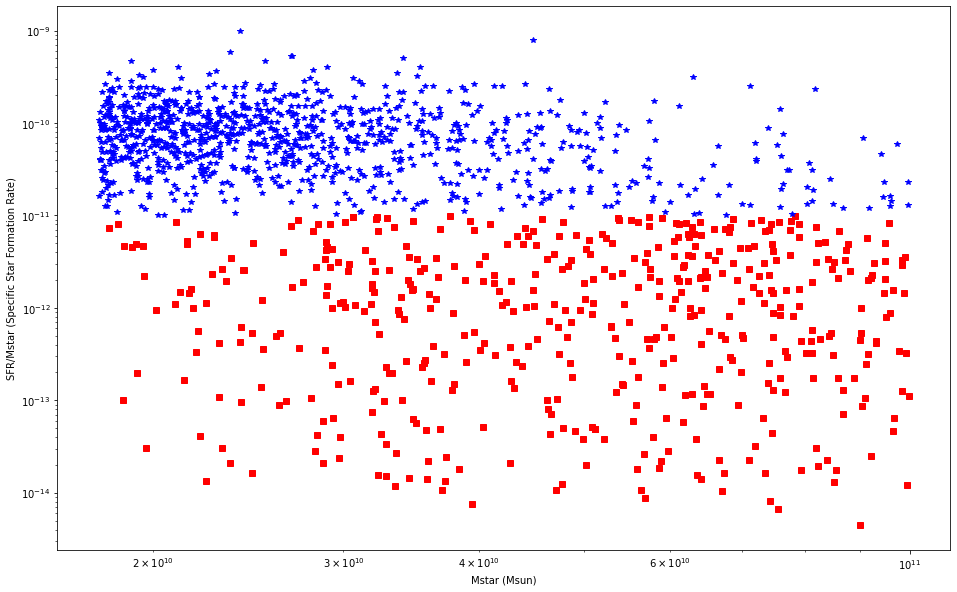

In [38]:
#split a medium-mass sample by star-forming versus non-star-forming
#this is a crude E/S proxy

nonsf=data_000[si][np.log10(ssfr[si])<=-11]
sf=data_000[si][np.log10(ssfr[si])>-11]

f=pyplot.figure(figsize=(16,10))
ax=f.add_subplot(111)
ax.loglog(nonsf['Mstar'],nonsf['SFR']/nonsf['Mstar'],'rs')
ax.loglog(sf['Mstar'],sf['SFR']/sf['Mstar'],'b*')

ax.set_xlabel('Mstar (Msun)')
ax.set_ylabel('SFR/Mstar (Specific Star Formation Rate)')

In [34]:
nonsf  #note:  a bunch of stuff has zero SFR and therefore fell off the plots above

Snap,SubfindID,redshift,Mstar,SFR,IsCentral
int64,int64,float64,float64,float64,int64
99,4,0.0,92655380000.0,0.2838,0
99,12,0.0,55515450000.0,0.0,0
99,13,0.0,63111650000.0,0.0,0
99,15,0.0,49638880000.0,0.0,0
99,16,0.0,64994670000.0,0.0,0
99,17,0.0,54539180000.0,0.0,0
99,18,0.0,60491630000.0,0.0175,0
99,20,0.0,28922570000.0,0.1228,0
99,21,0.0,83323350000.0,0.0,0


In [35]:
sf

Snap,SubfindID,redshift,Mstar,SFR,IsCentral
int64,int64,float64,float64,float64,int64
99,24,0.0,22239170000.0,2.0387,0
99,32,0.0,30358790000.0,0.4512,0
99,36,0.0,21058810000.0,0.4063,0
99,41,0.0,33731650000.0,7.313,0
99,43,0.0,20568070000.0,1.827,0
99,50,0.0,19857490000.0,0.339,0
99,52,0.0,19762120000.0,0.4588,0
99,17211,0.0,36547490000.0,2.5241,0
99,17214,0.0,20960140000.0,0.9162,0
